In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import math
import os
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
pip install numpy pandas seaborn scikit-learn statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
SPLIT_METHOD = 'time'  # 'time' or 'random'
DATA_PATH ="C:\\Users\\harip\\Desktop\\RideWise-Predicting-Bike-sharing-Demand\\Data\\day.csv"
OUTPUT_DIR = "."
df = pd.read_csv(DATA_PATH)

## Preprocessing

In [6]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [7]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [8]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,1
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,0
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,0
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,0


## Modeling

In [9]:
# 1. Define dependent and independent variables
dependent_variable = 'cnt'
independent_variables = [col for col in df.columns if col != dependent_variable]

# 2. Target transformation (square root)
y = np.sqrt(df[dependent_variable])

# 3. Create feature matrix
X = df[independent_variables]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# 5. Scaling (MinMax)
scaler = MinMaxScaler()
scaler.fit(X_train)

# Save scaler for deployment/reuse
save_dir = r"C:\Users\harip\Desktop\RideWise-Predicting-Bike-sharing-Demand\Modeling\saved_models"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "DR_scaler.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved successfully at: {save_path}")

# 6. Transform features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 7. Quick shape/preview checks
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(pd.DataFrame(X_train, columns=independent_variables).head(10))


Scaler saved successfully at: C:\Users\harip\Desktop\RideWise-Predicting-Bike-sharing-Demand\Modeling\saved_models\DR_scaler.pkl
X_train shape: (584, 11)
y_train shape: (584,)
X_test shape: (147, 11)
y_test shape: (147,)
     season   yr      mnth  holiday   weekday  workingday  weathersit  \
0  0.333333  0.0  0.272727      0.0  0.833333         1.0         0.5   
1  0.333333  1.0  0.363636      0.0  0.833333         1.0         0.0   
2  1.000000  1.0  0.818182      0.0  0.666667         1.0         0.5   
3  0.333333  1.0  0.363636      0.0  0.000000         0.0         0.0   
4  1.000000  0.0  0.818182      0.0  0.166667         1.0         0.0   
5  0.666667  1.0  0.545455      0.0  0.333333         1.0         0.0   
6  0.666667  0.0  0.727273      0.0  0.666667         1.0         1.0   
7  0.000000  0.0  0.000000      0.0  0.333333         1.0         0.5   
8  0.666667  1.0  0.636364      0.0  1.000000         0.0         0.0   
9  0.666667  0.0  0.636364      0.0  0.166667    

In [10]:
print("y_train sample:", y_train[:10])
print("y_test sample:", y_test[:10])


y_train sample: 97     38.353618
503    87.401373
642    85.603738
498    78.217645
303    60.572271
570    87.132084
250    42.918527
17     26.134269
595    88.684835
240    68.073490
Name: cnt, dtype: float64
y_test sample: 196    76.961029
187    67.764297
14     35.327043
31     36.878178
390    63.835727
319    42.626283
299    51.565492
702    78.955684
462    82.807005
27     34.161382
Name: cnt, dtype: float64


## Model training

In [11]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

# Assume: X_train, y_train, X_test, y_test, X (full feature DataFrame) are already defined.
# Replace these with your own splitting and preprocessing as needed.

models = {
    "Lasso": Lasso(alpha=0.01, random_state=42),
    "Ridge": Ridge(alpha=0.01, random_state=42),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoost": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

save_dir = r"C:\Users\harip\Desktop\RideWise-Predicting-Bike-sharing-Demand\Modeling\saved_models"

results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Train
    model.fit(X_train, y_train)

    # Save
    joblib.dump(model, f"{save_dir}/{name.lower()}.pkl")

    # Coefficient/Feature Importance (if available)
    if hasattr(model, 'coef_'):
        coefs = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
        print("Coefficients:\n", coefs)
    elif hasattr(model, 'feature_importances_'):
        feat_imp = pd.DataFrame(model.feature_importances_, X.columns, columns=["FeatureImportance"])
        print("Feature Importances:\n", feat_imp)

    # Intercept (if available)
    if hasattr(model, 'intercept_'):
        print("Intercept:", model.intercept_)

    # Score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("Train R2:", train_score)
    print("Test R2:", test_score)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Inverse target transformation: predicted counts
    y_pred_cnt_train = np.round(np.clip(y_pred_train, 0, None) ** 2, 0)
    actual_cnt_train = np.round(y_train ** 2, 0)

    # Display first 10 actual vs predicted values
    print("Training set comparison (Actual vs Predicted):")
    train_comp = pd.DataFrame({
        "Actual_cnt": actual_cnt_train[:10],
        "Predicted_cnt": y_pred_cnt_train[:10]
    })
    print(train_comp)

    # If you want to also do this for the test set:
    y_pred_test = model.predict(X_test)
    y_pred_cnt_test = np.round(np.clip(y_pred_test, 0, None) ** 2, 0)
    actual_cnt_test = np.round(y_test ** 2, 0)

    print("Test set comparison (Actual vs Predicted, first 10 rows):")
    test_comp = pd.DataFrame({
        "Actual_cnt": actual_cnt_test[:10],
        "Predicted_cnt": y_pred_cnt_test[:10]
    })
    print(test_comp)
    

    print("-----------------------------")


    # Store results if you want further analysis
    results[name] = {
        "train_score": train_score,
        "test_score": test_score,
        "y_pred_train": y_pred_train,
        "y_pred_test": y_pred_test,
    }
    
    print("-----------------------------")



--- Lasso ---
Coefficients:
             Coefficient
season        11.706650
yr            14.748537
mnth          -2.219120
holiday       -3.569199
weekday        2.832979
workingday     0.819896
weathersit    -9.231571
temp          34.112583
hum           -7.269402
windspeed     -9.353286
weekend        0.000000
Intercept: 41.62786411195078
Train R2: 0.779724859915109
Test R2: 0.8089272735834534
Training set comparison (Actual vs Predicted):
     Actual_cnt  Predicted_cnt
97       1471.0         2029.0
503      7639.0         6328.0
642      7328.0         7002.0
498      6118.0         5735.0
303      3669.0         3469.0
570      7592.0         7479.0
250      1842.0         3079.0
17        683.0         1361.0
595      7865.0         7325.0
240      4634.0         4685.0
Test set comparison (Actual vs Predicted, first 10 rows):
     Actual_cnt  Predicted_cnt
196      5923.0         5018.0
187      4592.0         5471.0
14       1248.0         1780.0
31       1360.0         146

#### Model evaluation

In [28]:
import os
import pickle
import pandas as pd

if os.path.exists("test_result.pkl"):
    with open("test_result.pkl", "rb") as f:
        test_result_df = pickle.load(f)
    print("Loaded existing results file.")
else:
    test_result_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2_score", "Adjusted_R2"])
    print("No results file found. Starting new dataframe.")


No results file found. Starting new dataframe.


In [31]:
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_and_store(
    model_name, y_true, y_pred, X_test,
    results_df=None, save_path="test_result.pkl",
    inverse_transform=None
):
    """
    Evaluates regression metrics on original scale, updates DataFrame, and saves to file.
    - inverse_transform: function applied to both y_true, y_pred if not None (e.g., lambda x: x**2 for sqrt-inverse)
    """
    required_cols = ["Model", "MAE", "MSE", "RMSE", "R2_score", "Adjusted_R2"]
    if results_df is None or not isinstance(results_df, pd.DataFrame) or any(col not in results_df.columns for col in required_cols):
        results_df = pd.DataFrame(columns=required_cols)

    # Inverse-transform if needed
    if inverse_transform is not None:
        y_true = inverse_transform(y_true)
        y_pred = inverse_transform(y_pred)

    # Compute metrics
    MAE  = mean_absolute_error(y_true, y_pred)
    MSE  = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2   = r2_score(y_true, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1] if len(X_test.shape) > 1 else 1
    adj_r2 = 1 - (1 - R2) * ((n - 1) / (n - p - 1)) if n > p + 1 else np.nan

    print(f"{model_name}: ['MAE': {round(MAE, 3)}, 'MSE': {round(MSE, 3)}, "
          f"'R2': {round(R2, 3)}, 'RMSE': {round(RMSE,3)}, 'adj_r2': {round(adj_r2,3)}]")

    metrics_dict = {
        "Model": model_name,
        "MAE": round(MAE, 4),
        "MSE": round(MSE, 4),
        "RMSE": round(RMSE, 4),
        "R2_score": round(R2, 4),
        "Adjusted_R2": round(adj_r2, 4)
    }

    # Append or update model result
    if model_name not in results_df["Model"].values:
        results_df = pd.concat([results_df, pd.DataFrame([metrics_dict])], ignore_index=True)
    else:
        results_df.loc[results_df["Model"] == model_name, required_cols[1:]] = list(metrics_dict.values())[1:]
        print(f" Model '{model_name}' already exists. Updated metrics.")

    # Save
    with open(save_path, 'wb') as f:
        pickle.dump(results_df, f)
    print(f"✔ Results saved to {save_path}")

    return results_df



In [32]:
test_result_df = None  # Initialize outside the loop

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Predicted sqrt(count) if target was sqrt-transformed

    # Use inverse_transform param to square back to true counts
    test_result_df = evaluate_and_store(
        model_name=model_name,
        y_true=y_test,
        y_pred=y_pred,
        X_test=X_test,
        results_df=test_result_df,
        save_path="test_result.pkl",
        inverse_transform=lambda x: x**2  # <-- add this!
    )


Lasso: ['MAE': 730.452, 'MSE': 933026.187, 'R2': 0.781, 'RMSE': 965.933, 'adj_r2': 0.763]
✔ Results saved to test_result.pkl
Ridge: ['MAE': 731.456, 'MSE': 934686.465, 'R2': 0.78, 'RMSE': 966.792, 'adj_r2': 0.762]
✔ Results saved to test_result.pkl
ElasticNet: ['MAE': 728.412, 'MSE': 911130.125, 'R2': 0.786, 'RMSE': 954.531, 'adj_r2': 0.768]
✔ Results saved to test_result.pkl
DecisionTree: ['MAE': 619.952, 'MSE': 747412.361, 'R2': 0.824, 'RMSE': 864.53, 'adj_r2': 0.81]
✔ Results saved to test_result.pkl
RandomForest: ['MAE': 495.697, 'MSE': 433640.198, 'R2': 0.898, 'RMSE': 658.514, 'adj_r2': 0.89]
✔ Results saved to test_result.pkl
GradientBoost: ['MAE': 530.281, 'MSE': 493532.392, 'R2': 0.884, 'RMSE': 702.519, 'adj_r2': 0.875]
✔ Results saved to test_result.pkl


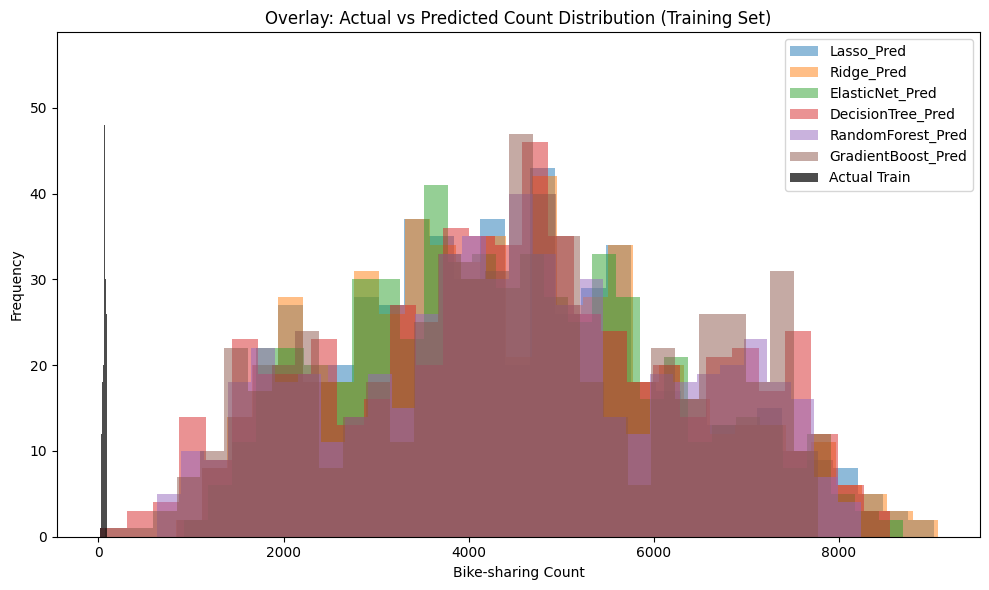

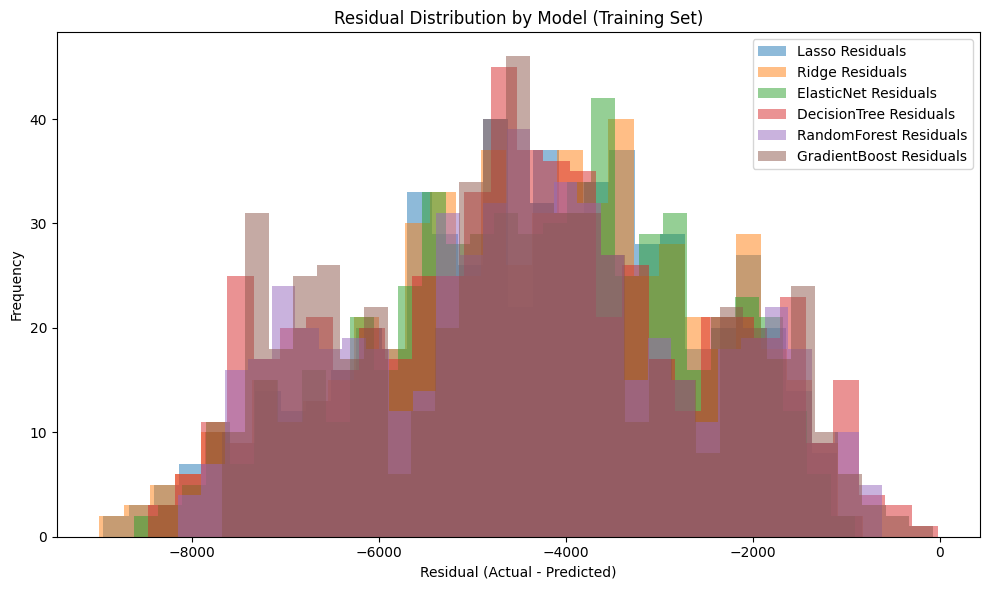

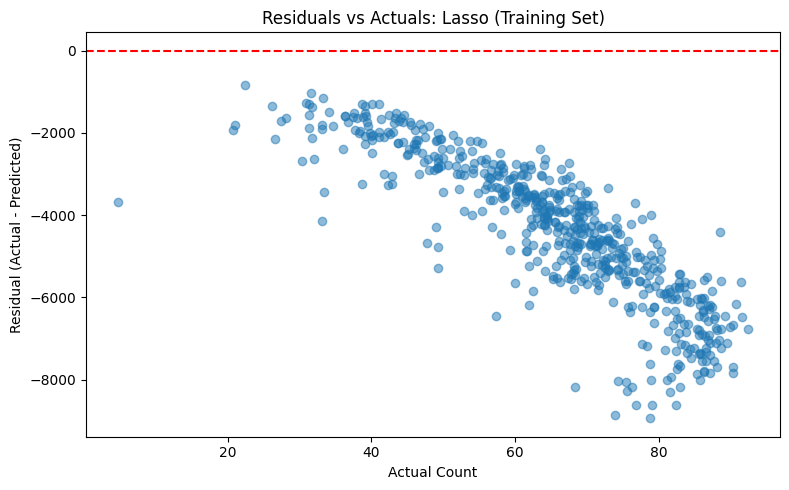

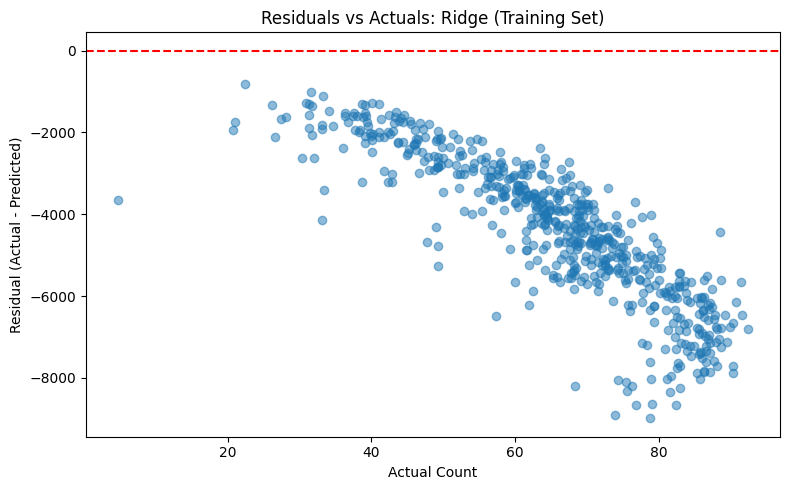

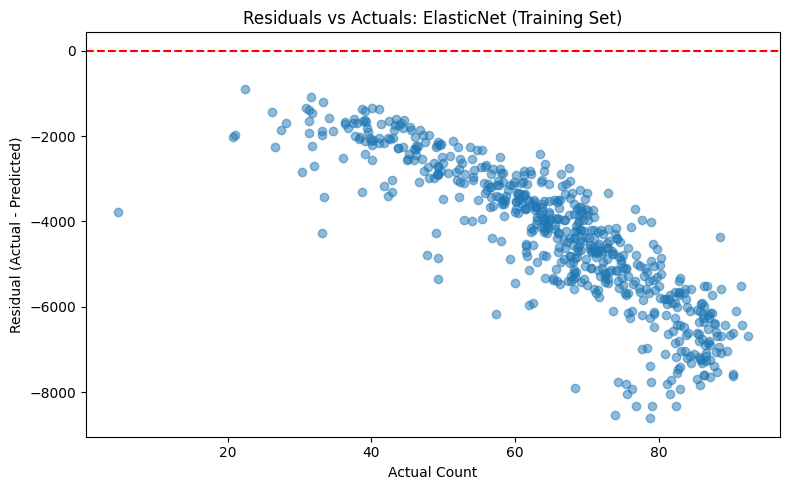

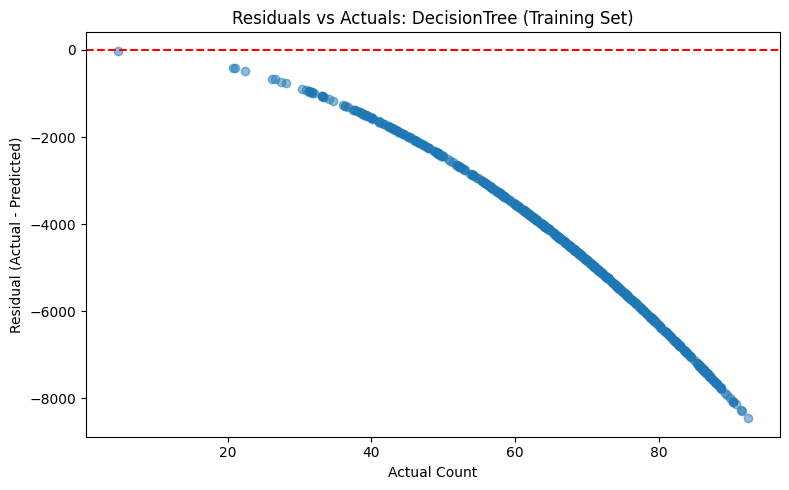

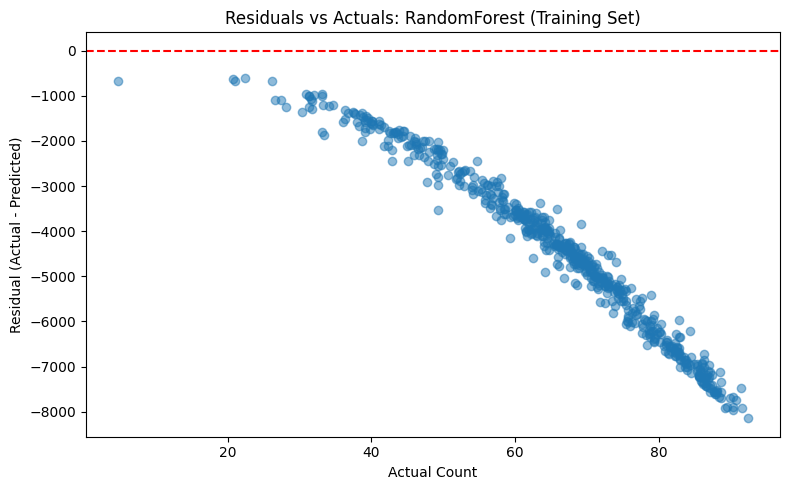

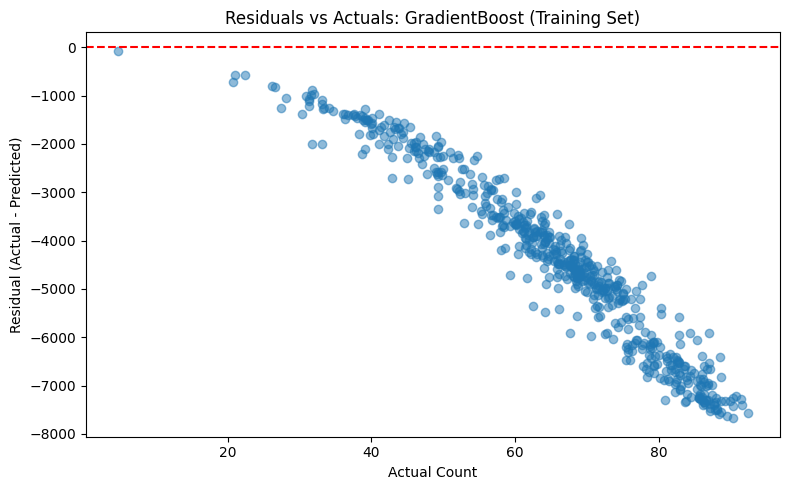

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# --- Predict on training set for each model ---
train_preds = {}
residuals = {}

for name, model in models.items():
    y_pred_train_sqrt = model.predict(X_train)
    y_pred_train = np.round(y_pred_train_sqrt**2, 0)
    train_preds[name] = y_pred_train
    residuals[name] = y_train - y_pred_train  # Residual = actual - predicted

# --- 1. Overlay Histograms: Actual vs Predicted (ALL MODELS) ---
plt.figure(figsize=(10, 6))
for name in models:
    plt.hist(train_preds[name], bins=30, alpha=0.5, label=f"{name}_Pred")
plt.hist(y_train, bins=30, color='black', alpha=0.7, label='Actual Train', linewidth=2)
plt.title("Overlay: Actual vs Predicted Count Distribution (Training Set)")
plt.xlabel("Bike-sharing Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Residual Distribution for All Models ---
plt.figure(figsize=(10, 6))
for name in models:
    plt.hist(residuals[name], bins=30, alpha=0.5, label=f"{name} Residuals")
plt.title("Residual Distribution by Model (Training Set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# --- 3. Residuals vs Actual (Scatter by Model) ---
for name in models:
    plt.figure(figsize=(8, 5))
    plt.scatter(y_train, residuals[name], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Actual Count")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.title(f"Residuals vs Actuals: {name} (Training Set)")
    plt.tight_layout()
    plt.show()


## Model tuning

In [16]:
# Define your models and their parameter grids
models_and_grids = {
    "Lasso": {
        "model": Lasso(),
        "params": {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
    },
    "Ridge": {
        "model": Ridge(),
        "params": {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
    },
    "ElasticNet": {
        "model": ElasticNet(),
        "params": {
            'alpha': [1e-3, 1e-2, 1e-1, 1, 5, 10],
            'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            'max_depth': [None, 2, 4, 6, 8, 10, 12],
            'min_samples_split': [2, 5, 10, 20]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            'n_estimators': [50, 100],
            'max_depth': [None, 4, 6, 8, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    "GradientBoost": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

best_models = {}

for model_name, mp in models_and_grids.items():
    print(f"--- Tuning {model_name} ---")
    gs = GridSearchCV(mp["model"], mp["params"], scoring='neg_mean_squared_error', cv=4, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"Best params for {model_name}: {gs.best_params_}")
    print(f"Best neg-MSE for {model_name}: {gs.best_score_}")
    # Store best estimator for later use (retraining, prediction, saving)
    best_models[model_name] = gs.best_estimator_
    print("----------------------------")


--- Tuning Lasso ---
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best params for Lasso: {'alpha': 0.01}
Best neg-MSE for Lasso: -56.97552431766796
----------------------------
--- Tuning Ridge ---
Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best params for Ridge: {'alpha': 1}
Best neg-MSE for Ridge: -56.96189103741192
----------------------------
--- Tuning ElasticNet ---
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best params for ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}
Best neg-MSE for ElasticNet: -56.914820863447794
----------------------------
--- Tuning DecisionTree ---
Fitting 4 folds for each of 28 candidates, totalling 112 fits
Best params for DecisionTree: {'max_depth': 12, 'min_samples_split': 20}
Best neg-MSE for DecisionTree: -55.2188862737133
----------------------------
--- Tuning RandomForest ---
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best params for RandomForest: {'max_depth': 10, 'min_sample

In [35]:
import os
import pickle
import pandas as pd

if os.path.exists("test_result.pkl"):
    with open("test_result.pkl", "rb") as f:
        test_result_df = pickle.load(f)
    print("Loaded existing results file.")
else:
    test_result_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2_score", "Adjusted_R2"])
    print("No results file found. Starting new dataframe.")


Loaded existing results file.


In [ ]:

for model_name, mp in models_and_grids.items():
    print(f"--- Tuning {model_name} ---")
    gs = GridSearchCV(mp["model"], mp["params"], scoring='neg_mean_squared_error', cv=4, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"Best params for {model_name}: {gs.best_params_}")
    print(f"Best neg-MSE for {model_name}: {gs.best_score_}")

    # Using GridSearchCV best estimator for prediction
    y_pred = gs.best_estimator_.predict(X_test)

    # Save results with modified model name (for GridSearchCV)
    test_result_df = evaluate_and_store(
        model_name=f"{model_name} (GridSearchCV)",
        y_true=y_test,
        y_pred=y_pred,
        X_test=X_test,
        results_df=test_result_df,
        save_path="test_result.pkl",
        inverse_transform=lambda x: x**2
    )

    print("----------------------------")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (220029545.py, line 18)

In [19]:
test_result_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,5.6512,54.2754,7.3672,0.8089,0.7934
1,Ridge,5.6538,54.0701,7.3532,0.8096,0.7941
2,ElasticNet,5.7014,54.8511,7.4062,0.8069,0.7912
3,DecisionTree,5.2188,56.7695,7.5346,0.8001,0.7839
4,RandomForest,4.2225,36.0077,6.0006,0.8732,0.8629
5,GradientBoost,4.3571,34.6279,5.8845,0.8781,0.8682
6,Lasso (GridSearchCV),5.6512,54.2754,7.3672,0.8089,0.7934
7,Ridge (GridSearchCV),5.6510,54.0693,7.3532,0.8097,0.7941
8,ElasticNet (GridSearchCV),5.6485,54.2671,7.3666,0.8090,0.7934
9,DecisionTree (GridSearchCV),4.8518,45.8999,6.7749,0.8384,0.8252


## Visualization 

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_Pred_vs_actual(y_pred_test, y_test, model_name="Model"):
    ''' Visualize predicted values with actual values. '''
    plt.figure(figsize=(20,8))
    plt.plot(np.array(y_test), label="Actual")
    plt.plot(y_pred_test, label="Predicted", linestyle="--")
    plt.legend()
    plt.title(f"Predicted V/S Actual: {model_name}")
    plt.show()


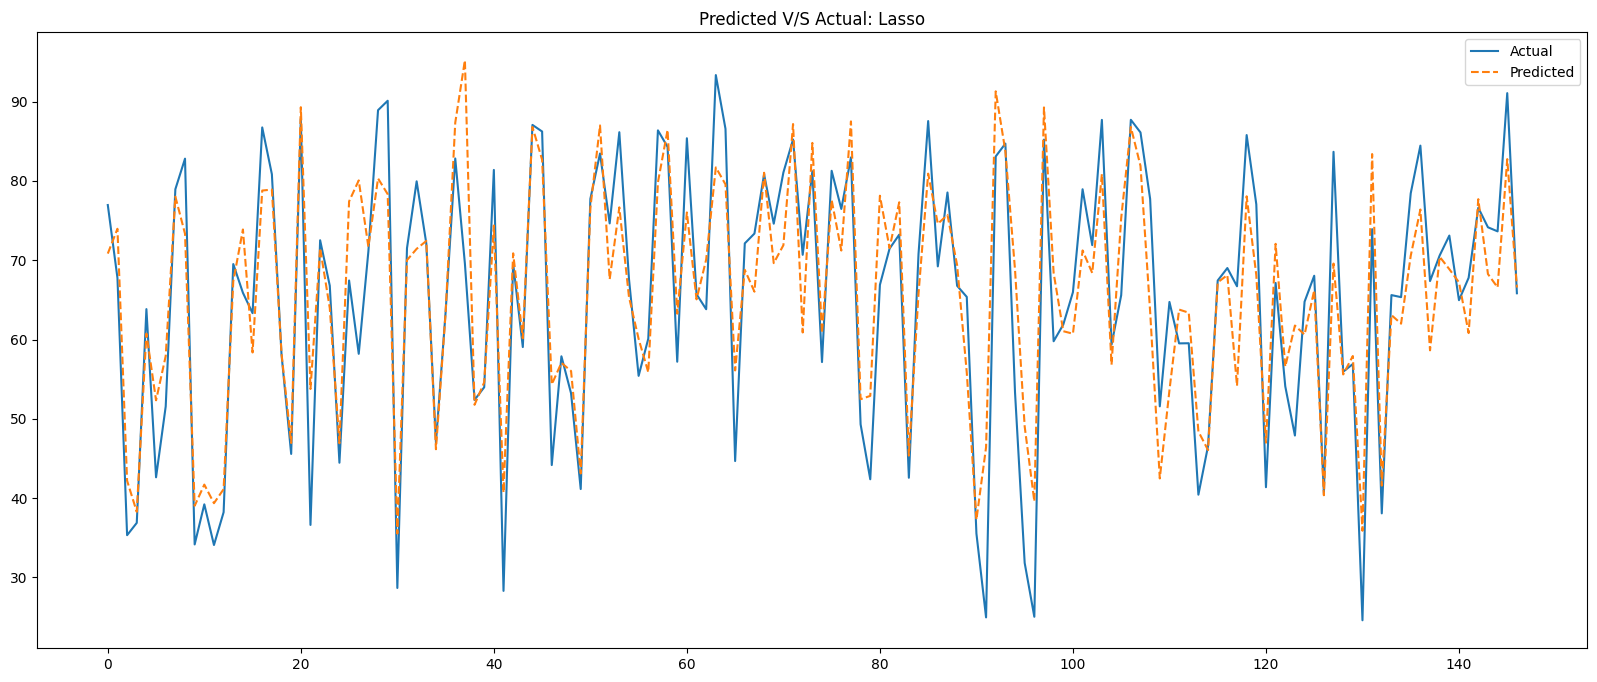

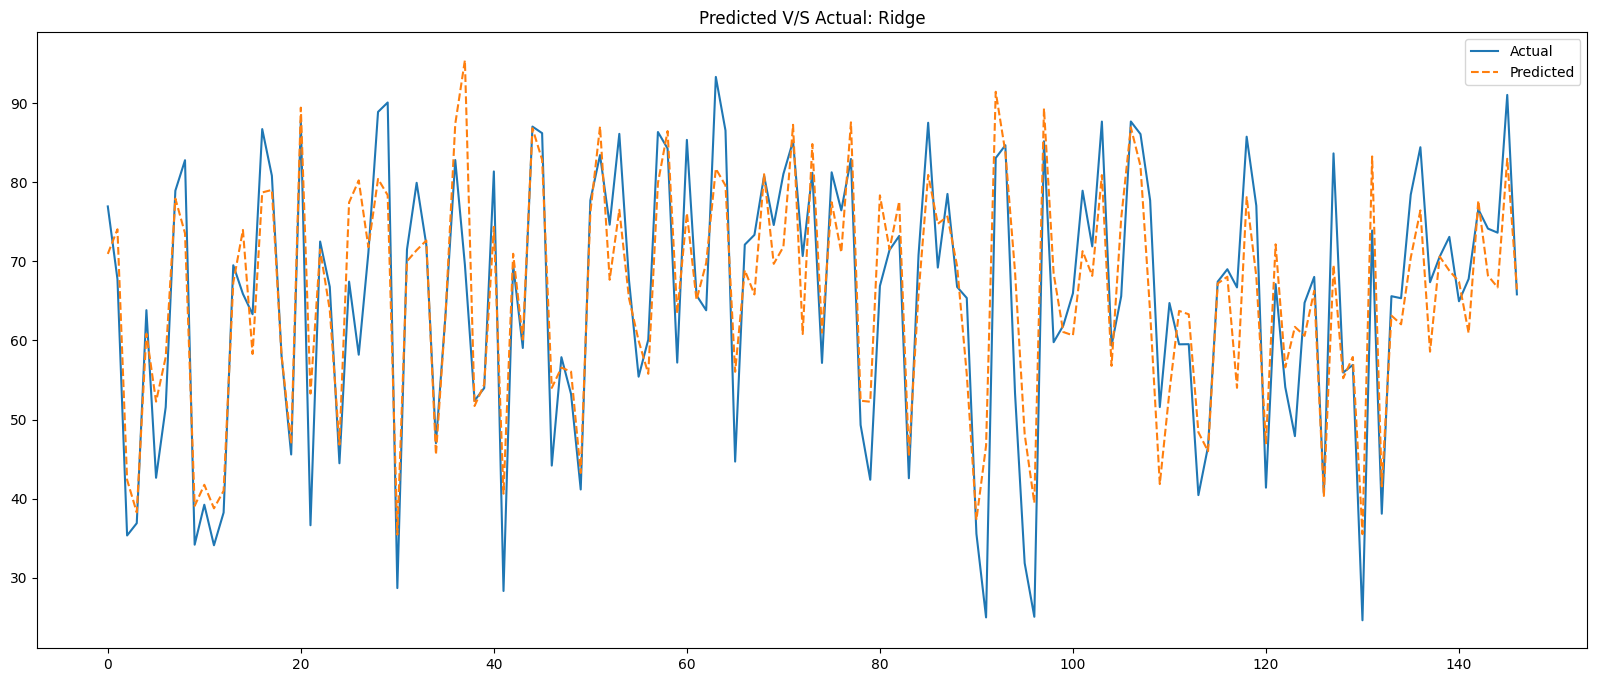

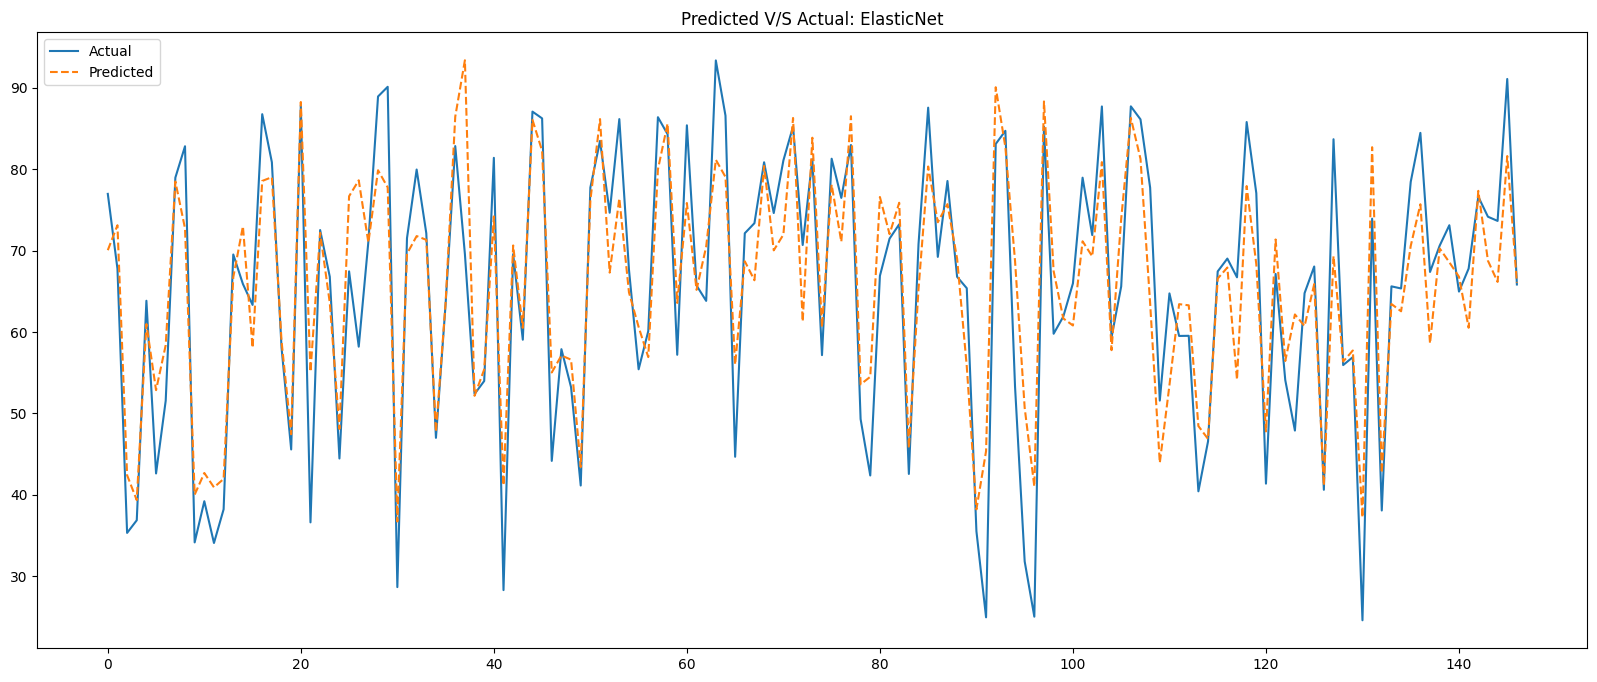

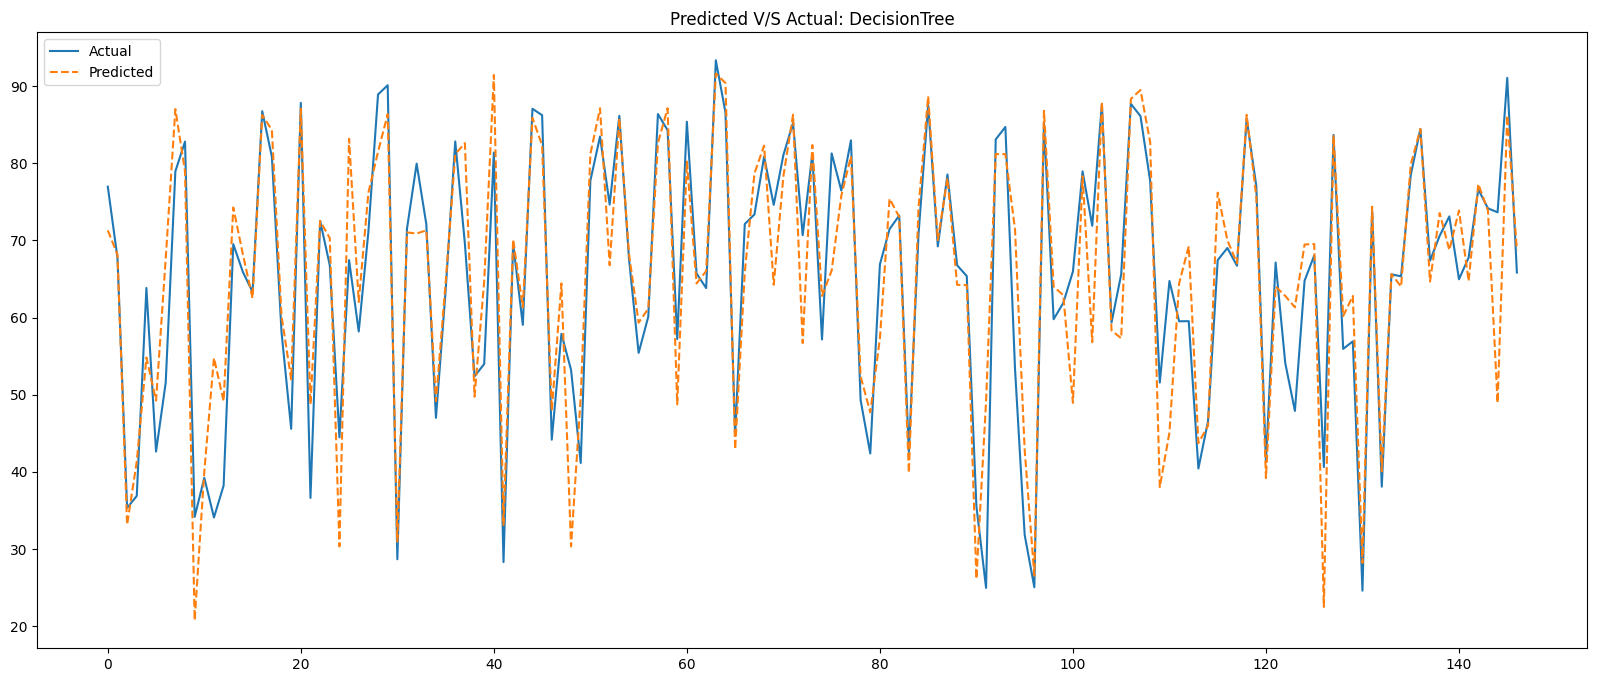

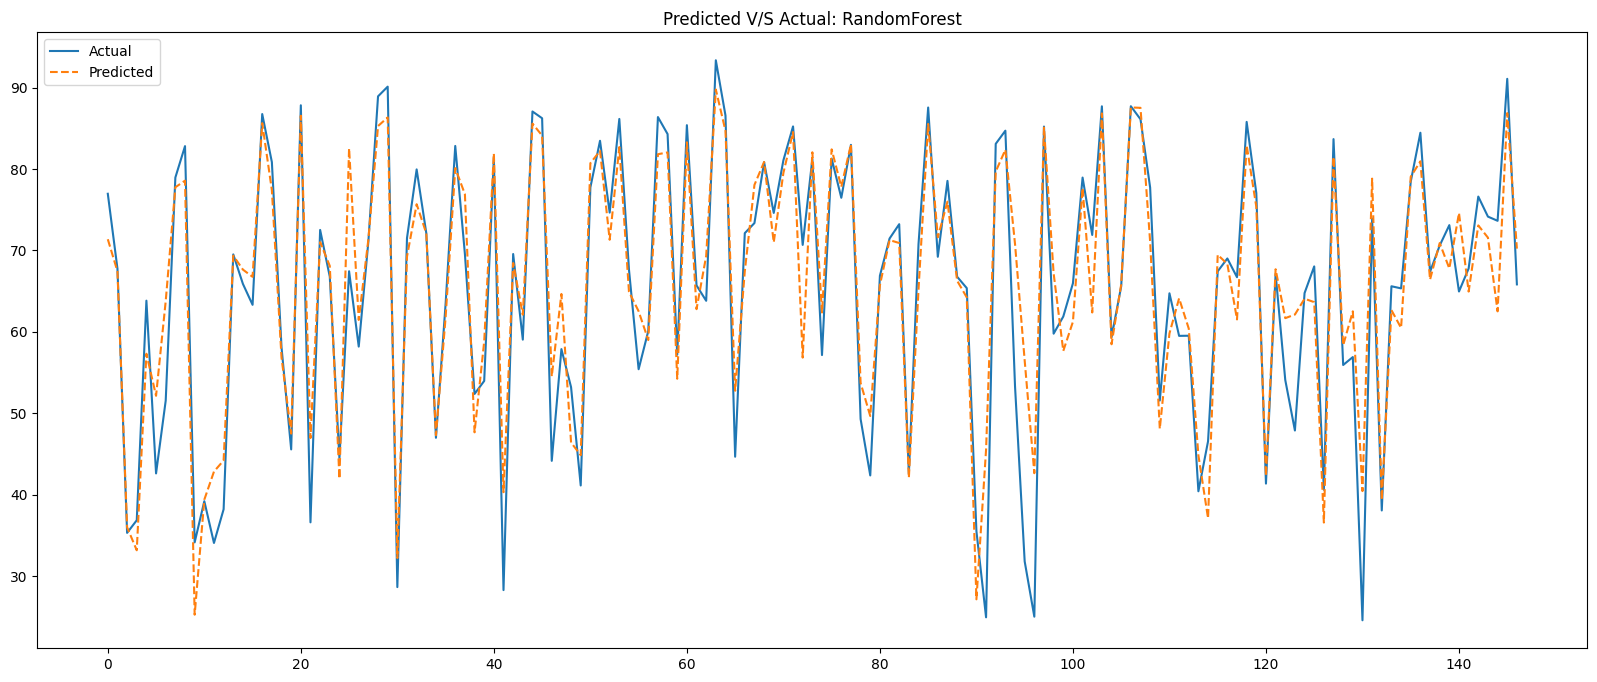

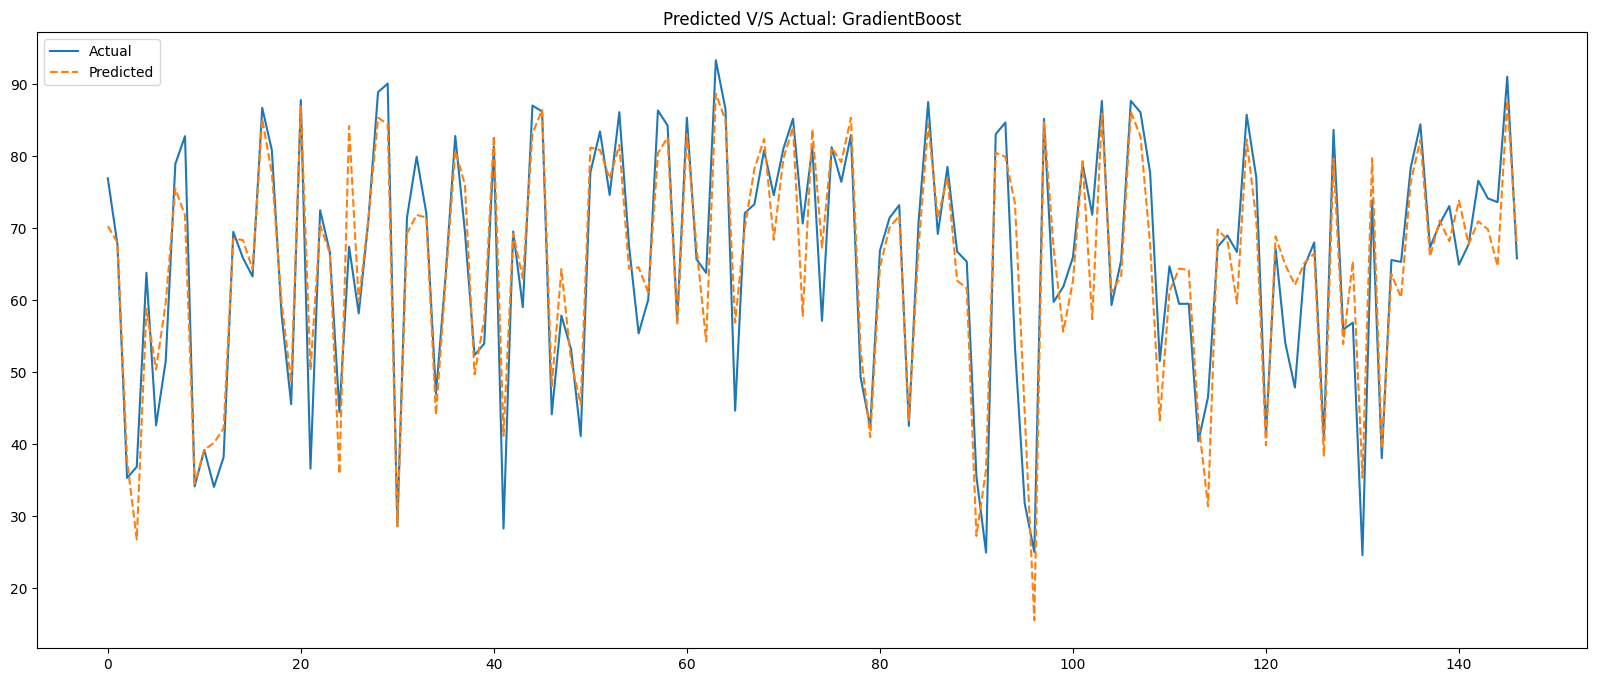

In [21]:
for name, result_dict in results.items():
    y_pred_test = result_dict["y_pred_test"]
    plot_Pred_vs_actual(y_pred_test, y_test, model_name=name)


## Model performance comparison

In [22]:
# ============================================================
# 1. R-SQUARED COMPARISON (Bar Chart)
# ============================================================
def plot_r2(performance_df):
    df = test_result_df.sort_values(by="R2_score", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(df["Model"], df["R2_score"])
    plt.xlabel("R² Score")
    plt.title("Model Comparison by R² Score")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig("plot_r2_score.png")
    plt.show()

In [23]:
# ============================================================
# 2. MAE / MSE / RMSE (Grouped Bar Chart)
# ============================================================
def plot_error_metrics(performance_df):
    df = test_result_df.copy()
    metrics = ["MAE", "MSE", "RMSE"]
    
    x = np.arange(len(df["Model"]))
    w = 0.25

    plt.figure(figsize=(14, 6))
    plt.bar(x - w, df["MAE"], width=w, label="MAE")
    plt.bar(x,     df["MSE"], width=w, label="MSE")
    plt.bar(x + w, df["RMSE"], width=w, label="RMSE")

    plt.xticks(x, df["Model"], rotation=45, ha="right")
    plt.ylabel("Error Value")
    plt.title("Error Metric Comparison Across Models")
    plt.legend()
    plt.tight_layout()
    plt.savefig("plot_error_metrics.png")
    plt.show()


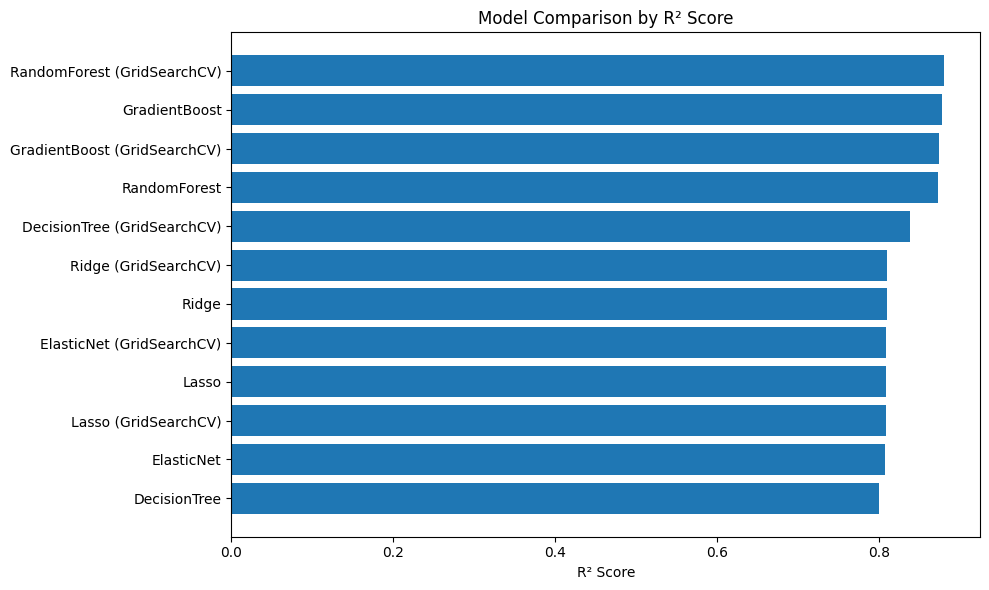

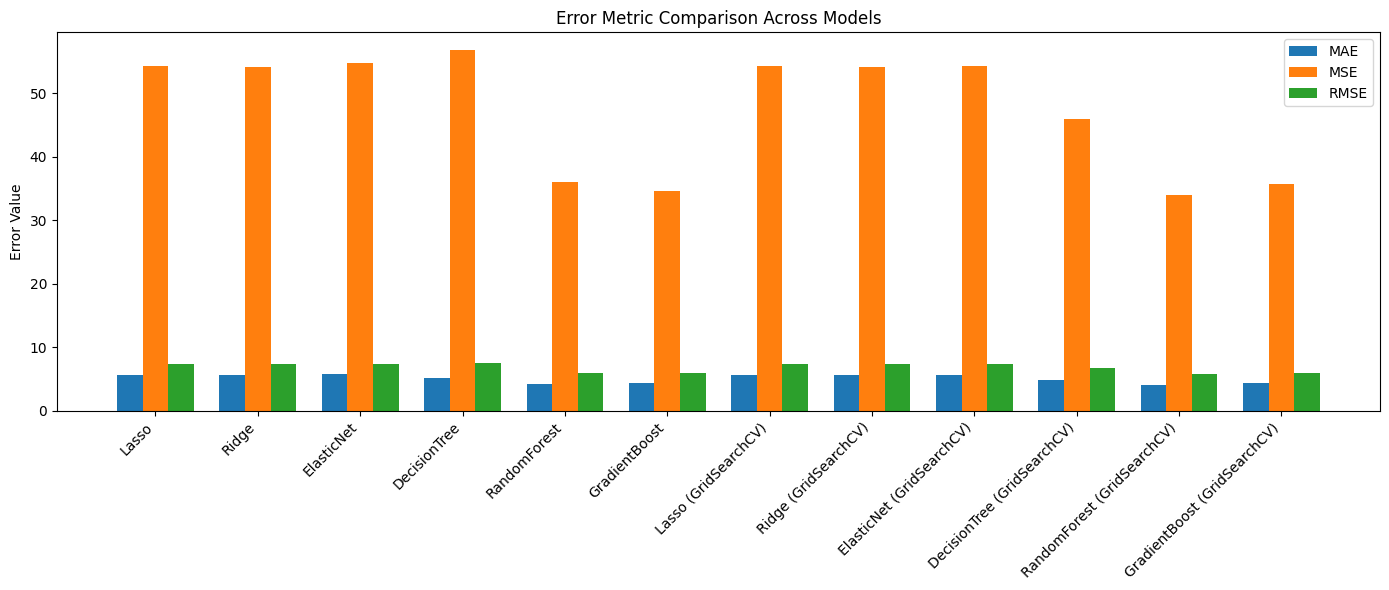

In [24]:
# ============================================================
#  RUN ALL PLOTS
# ============================================================
plot_r2(test_result_df)
plot_error_metrics(test_result_df)




## Model summary
Linear Models (Lasso, Ridge, ElasticNet):
Adjusted R² scores ~79–79.4% (base and tuned), indicating solid but not top performance.

DecisionTree:
Base: ~78.4%, Tuned: ~80.6%. Some improvement with tuning but still below ensemble models.

RandomForest:
Base: ~86.3%, Tuned: ~86.4%. Top-performing and highly robust.

GradientBoost:
Base: ~86.8%, Tuned: ~87.2%. Slightly best overall after tuning.